# (Q3)

Consider the following game, called the GHZ game. There are three players, Alice, Bob, and Charlie, and a Referee who mediates the game. The Referee will give one bit each to the players such that even number of 1 are given. Let us call the bits given to Alice, Bob, and Charlie as r, s, t respectively. Then each of the 3 players must give one bit back to the Referee, call the bits given by them as a, b, c respectively. Then Alice, Bob and Charlie win if a ⊕ b ⊕ c = r ∨ s ∨ t, else the Referee wins.
(a) Classical Case: Alice, Bob and Charlie get to discuss their strategy beforehand. They are not allowed to communicate during the game. Show that the best strategy for them is able to win 3/4 th of the time, and they can not do better.
(b) Quantum Case: Alice, Bob and Charlie are allowed to discuss and share qubits before- hand. During the game they can not communicate with each other, but they can perform operations on their own qubits. Find a strategy that allows them to always win the game. Here are some hints for the same:
• They have to share entangled qubits, non-entangled qubits would be useless. In particular the GHZ state.
• They must perform some operation in case they get a 1 from the referee. They must not do this operation if they get a 0.
• Once everyone is done performing/not performing their operation, they must all measure and tell the referee three bits a, b, c based on the measurement.

In [3]:
import numpy as np
import matplotlib as plt
from numpy import pi

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, assemble
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

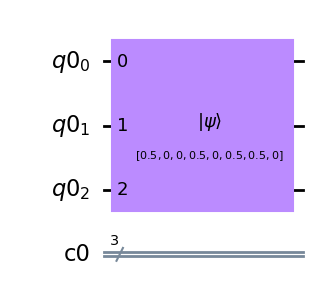

In [4]:
import math
desired_vector = [
    1 / math.sqrt(4) * complex(1, 0),
    0,
    0,
    1 / math.sqrt(4) * complex(1, 0),
    0,
    1 / math.sqrt(4) * complex(1, 0),
    1 / math.sqrt(4) * complex(1, 0),
    0]


q = QuantumRegister(3)
c = ClassicalRegister(3)

qc = QuantumCircuit(q,c)
qc.initialize(desired_vector, [q[0],q[1],q[2]])
qc.draw(output='mpl')

In [5]:
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(qc).result()
statevector = result.get_statevector()

# Visualize the state vector of the circuit
print("\nFinal State Vector:")
print(statevector)
array_to_latex(statevector, prefix="\\text{Statevector = }")


Final State Vector:
Statevector([0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0.5+0.j, 0.5+0.j,
             0. +0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

In [8]:
# Enter the bits given by the referee
print('Enter the bits given by the referee:')
r = int(input('r = '))
s = int(input('s = '))
t = int(input('t = '))

assert(r in [0,1] and s in [0,1] and t in [0,1])

l1 = [r,s,t]
print(l1)

Enter the bits given by the referee:
[1, 1, 0]


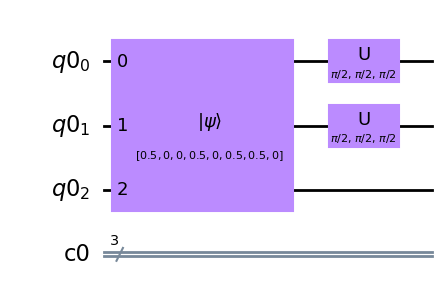

In [9]:
for i in range(3):
    if(l1[i]==1):
        qc.u(pi/2,pi/2,pi/2,q[i])

qc.draw(output='mpl')


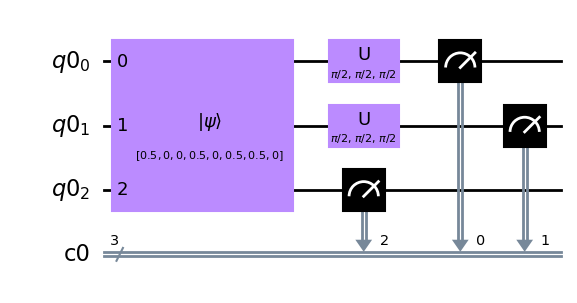

In [10]:
qc.measure(q,c)
qc.draw(output='mpl')

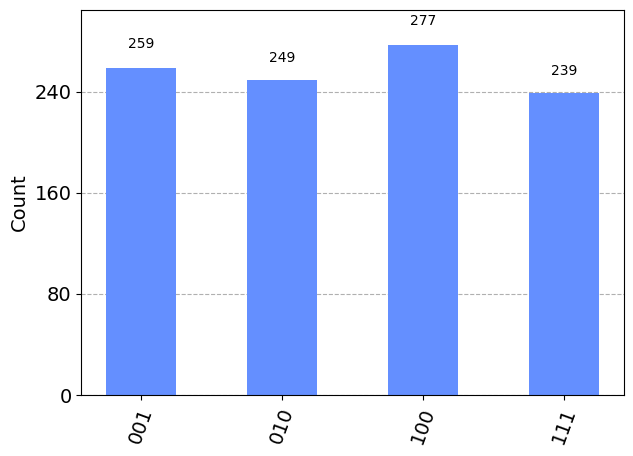

In [11]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
results = aer_sim.run(t_qc, shots=1024).result() 
counts = results.get_counts()
plot_histogram(counts)